# Introduction

I would like to start this article with three problems that are quite close to reality:

### The publisher problem

A publishing house received an order for 600 copies of the book "Basic Machine Learning" to Thai Binh and 400 copies to Hai Phong. That publishing house has 800 books in Nam Dinh warehouse and 700 books in Hai Duong warehouse. The price to deliver a book from Nam Dinh to Thai Binh is 50,000 VND (50k), to Hai Phong is 100k. The delivery price for a book from Hai Duong to Thai Binh is 150k, while to Hai Phong it is only 40k. To minimize delivery costs, how many books should the company distribute to each warehouse to each location?

**Analyse**

At first, I call:

<table>
    <tr>
        <td>Source</td>
        <td>Destination</td>
        <td>Cost</td>
        <td>Quantity</td>
    </tr>
    <tr>
        <td>Nam Dinh</td>
        <td>Thai Binh</td>
        <td>50k</td>
        <td>x</td>
    </tr>
    <tr>
        <td>Nam Dinh</td>
        <td>Hai Phong</td>
        <td>100k</td>
        <td>y</td>
    </tr>
    <tr>
        <td>Hai Duong</td>
        <td>Thai Binh</td>
        <td>150k</td>
        <td>z</td>
    </tr>
    <tr>
        <td>Hai Duong</td>
        <td>Hai Phong</td>
        <td>40k</td>
        <td>w</td>
    </tr>
</table>

Total cost requirement will be $f(x, y, z, w) = 50x + 100y + 150z + 40w$ with constraints:
- Shipping 600 books to Thai Binh: $x + z = 600$
- Shipping 400 books to Hai Phong: $y + w = 400$
- The number of books in Nam Dinh: $x + y \leq 800$
- The number of books in Hai Duong: $z + w \leq 700$
- $x, y, z, w \geq 0$

So to solve this we have a equation:

$$\begin{align}
(x, y, z, w) = \arg \min f(x, y, z, w) = 50x + 100y + 150z + 40w \\
\text{subject to: } x + z = 600, y + w = 400, x + y \leq 800, z + w \leq 700, x, y, z, w \geq 0
\end{align}$$

So, the cost function is a linear function, and constraints are *hyperplanes* and *halfspaces*. This is a ***linear programming*** problem.

Solution **can be**: $x = 600, y = 200, z = 0, w = 200$

### The farming problem

A farmer has a total of 10ha of arable land. He plans to grow coffee and pepper on this land with a total cost of growing no more than 16M (million VND). The cost to grow coffee is 2T per hectare, and to grow pepper is 1T per hectare. Coffee growing time is 1 day/ha and pepper growing time is 4 days/ha; while he only had a total of 32 days. After deducting all costs (including tree planting costs), each hectare of coffee brings a profit of 5T, each hectare of pepper brings a profit of 3T. How should I plant to maximize profits?

**Analyse**

Recall $x$ and $y$ is number of ha coffee and pepper, respectively. The profit  is $g(x, y) = 5x + 3y$. The constraints are:
- Total arable land: $x + y \leq 10$
- Total cost: $2x + y \leq 16$
- Total time: $x + 4y \leq 32$
- $x, y \geq 0$

With equation:

$$\begin{align}
(x, y) &= \arg \max g(x, y) = 5x + 3y \\
\text{subject to: } x + y &\leq 10, 2x + y \leq 16, x + 4y \leq 32, x, y \geq 0
\end{align}$$

Another linear programming problem.

Turn out that:
- All of the math problem above, which in the form of AI or ML we call it a **convex optimization problem**.
- Hard to find a global optimal solution, most of the time we can only find a local optimal solution.
- In real life, we can't solve it by hand, we need a computer to do it.

But first we need to understand all the theory about **convex optimization** and why **convex** is important

# Recall Optimization problems

Allow me to recall optimization problems in general. An optimization problem is a problem that requires finding the best solution from all feasible solutions:

$$\begin{align}
\vec{x}^* = \arg \min_{\vec{x}} f_0(\vec{x}) \\
\text{subject to: } f_i(\vec{x}) &\leq 0, i = 1, 2, ..., m \\
h_j(\vec{x}) &= 0, j = 1, 2, ..., n \\
\end{align}$$

| Notation                                           | Term                             |
|----------------------------------------------------|----------------------------------|
| $\vec{x} \in \mathbb{R}^n$                         | Decision variable                |
| $f_0: \mathbb{R}^n \to \mathbb{R}$                 | Objective/Loss/Cost function     |
| $f_i(\vec{x}) \leq 0$                              | Inequality constraints           |
| $f_i: \mathbb{R}^n \to \mathbb{R}$                 | Inequality constraint function   |
| $h_j(\vec{x}) = 0$                                 | Equality constraints             |
| $h_j: \mathbb{R}^n \to \mathbb{R}$                 | Equality constraint function     |
| $\mathcal{D} = \bigcap_{i=0}^m \text{dom} f_i \cap \bigcap_{j=1}^n \text{dom} h_j$ | Domain of the problem |


Beside:
- When $m = n = 0$, we have an **unconstrained optimization problem**.
- $\mathcal{D}$ is the set of all feasible solutions.
- *Optimal value* of a optimization problem define as:
$$p^* = \inf{\{f_0(\vec{x}) | f_i(\vec{x}) \leq 0, h_j(\vec{x}) = 0\}}$$

Where: $\inf$ is the infimum of a set, which is the greatest lower bound of the set. If problem is infeasible, $p^* = \infty$. If target function is unbounded, $p^* = -\infty$.

### Optimal and locally optimal points

Each point $\vec{x}^*$ is called an **optimal point** if $f_0(\vec{x}^*) = p^*$. A set of all optimal points is called the **optimal set**.

If *optimal set* is a non-empty set, then we say it's *solvable*. Otherwise, if an *optimal set* is empty, then we say it's *not attained / not achieved*.

In optimization problem (usually multiple dimision), we call a point $\vec{x}^*$ is a **locally optimal point** if there exists a variable (or radius) $\mathcal{R}$ such that:

$$f_0(x) = \inf{(f_0(\vec{z}) | f_i(\vec{z}) \leq 0 \\,
h_j(\vec{z}) = 0, ||\vec{z} - \vec{x}||_2 \leq \mathcal{R})}$$

If a point feasible $x$ satisfy $f_i(x) = 0$, we said that we say that the inequality constrains $i^{th}$ is **active**. Else, if $f_i(x) < 0$, we said that the inequality constrains $i^{th}$ is **inactive**.

### Some important concepts

Optimization problems with maximizing the objective function and constraints in other forms can be reduced to this form:

- $\max f_0(x) \Leftrightarrow \min -f_0(x)$
- $f_i(x) \leq g(x) \Leftrightarrow f_i(x) - g(x) \leq 0$
- $f_i(x) \geq 0 \Leftrightarrow -f_i(x) \leq 0$
- $a \leq f_i(x) \leq b \Leftrightarrow f_i(x) - b \leq 0, a - f_i(x) \leq 0$
- $f_i(x) \leq 0 \Leftrightarrow f_i(x) + s_i = 0, s_i \geq 0$. $s_i$ is called **slack variable**.

# Convex optimization problem

### Definition

A convex optimization problem is an optimization problem:

$$\begin{align}
\vec{x}^* = \arg \min_{\vec{x}} f_0(\vec{x}) \\
\text{subject to: } f_i(\vec{x}) &\leq 0, i = 1, 2, ..., m \\
h_j(\vec{x}) &= \vec{a}_j^T \vec{x} - b_j = 0, j = 1, 2, ..., n \\
\end{align}$$

Where $f_0, f_1, \cdots, f_m$ are convex functions.

Compare to regular problems, we have three more conditions:
- Loss/cost function must be convex.
- Inequality constraint functions must be convex.
- Equality constraint functions must be affine (linear plus constant/scalar).

Some commonly known:
- A set of point satisfy $h_j(\vec{x}) = 0$ is a hyperplane.
- When $f_i$ is a convex function then a set of point satisfy $f_i(\vec{x}) \leq 0$ is a convex set (or 0-sublevel set).
- Thus, the set of points that satisfy all constraints is the intersection of convex sets, so it is a convex set.

### Local optimal of  optimization problem is global optimal

The most important ***property of the convex optimization problem is that any locally optimal point is a (globally) optimal point***.

This special properties can be proved by the following theorem. Call $x_0$ is a locally optimal point:

$$f_0(x_0) = \inf\{(f_0(x) | x \text{ is feasible}, ||x - x_0||_2 \leq R)\}$$

With any $R > 0$. Assume that $x_0$ is not a *globally optimal point*, then there exists a *feasible point* $y$ so that $f(y) < f(x_0)$ ($y$ not located in the neighborhood under consideration). We can find a $\theta \in [0, 1]$ small enough so that $z = \theta y + (1 - \theta) x_0$ is in the neighborhood of $x_0$, thus $\|z - x_0\|_2 \leq R$. We have:

$$f_0(z) = f_0((1 - \theta)x_0 + \theta y) \\
\leq (1 - \theta)f_0(x_0) + \theta f_0(y) \\
< (1 - \theta)f_0(x_0) + \theta f_0(x_0) = f_0(x_0)$$

This contradicts the assumption that $x_0$ is a locally optimal point. Therefore, $x_0$ must be a globally optimal point.

### Optimization condition for differentiable convex functions

If loss function $f_0$ is differentiable, by first-order condition, with any $x, x_0 \in \text{dom}f_0$:

$$f_0(x) \geq f_0(x_0) + \nabla f_0(x_0)^T(x - x_0)$$

Set $\mathcal{X}$ is the feasible set, then for any $x, x_0 \in \mathcal{X}$:

$$\nabla f_0(x_0)^T(x - x_0) \geq 0, \forall x \in \mathcal{X}$$

I will skip the proof of this theorem, but it is quite simple. Seek the proof in the book "Convex Optimization" by Stephen Boyd and Lieven Vandenberghe.

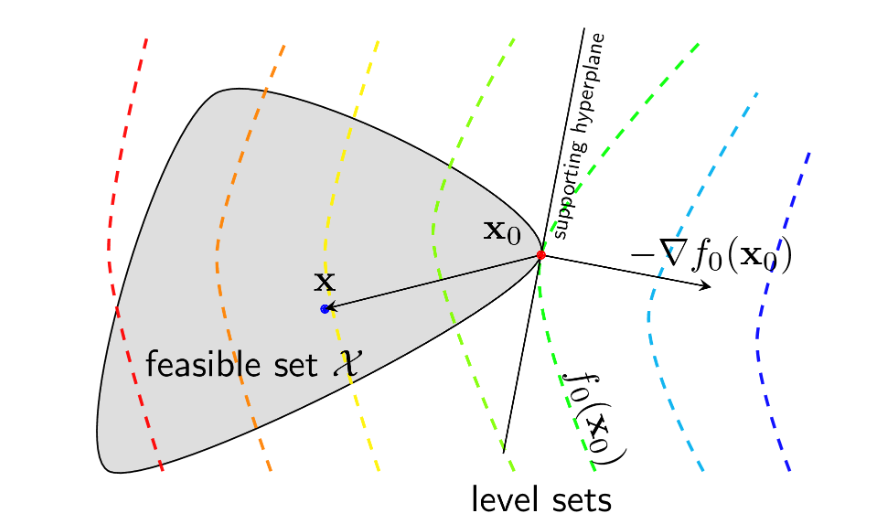

If $x_0$ is a optimal then with any $x \in \mathcal{X}$, vector going from $x_0$ to $x$ concatenated with the vector $- \nabla f_0(x_0)$ a obtuse angle. In other words, if we draw a tangent line at $x_0$, then the tangent line is always below the graph of the function. Beside, the feasible set is convex.

# Linear Programming